# Jupiter Notebook for Groupwork in AA 2024

#### Import Libraries

In [118]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display
from datetime import timedelta
import json
import numpy as np



### 1 Load and Explore Data:

In [119]:
# Load csv-files independently of the operating system (mac or windows or linux) in a pandas dataframe
charging_data = pd.read_csv(os.path.join('Data', 'charging_sessions.csv'))
weather_data = pd.read_csv(os.path.join('Data', 'weather_burbank_airport.csv'))

charging_data = charging_data.rename(columns={'Unnamed: 0': 'counter'})
charging_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66450 entries, 0 to 66449
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   counter           66450 non-null  int64  
 1   id                66450 non-null  object 
 2   connectionTime    66450 non-null  object 
 3   disconnectTime    66450 non-null  object 
 4   doneChargingTime  62362 non-null  object 
 5   kWhDelivered      66450 non-null  float64
 6   sessionID         66450 non-null  object 
 7   siteID            66450 non-null  int64  
 8   spaceID           66450 non-null  object 
 9   stationID         66450 non-null  object 
 10  timezone          66450 non-null  object 
 11  userID            49187 non-null  float64
 12  userInputs        49187 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 6.6+ MB


In [120]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29244 entries, 0 to 29243
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   city                     29244 non-null  object 
 1   timestamp                29244 non-null  object 
 2   temperature              29219 non-null  float64
 3   cloud_cover              29224 non-null  float64
 4   cloud_cover_description  29224 non-null  object 
 5   pressure                 29236 non-null  float64
 6   windspeed                29158 non-null  float64
 7   precipitation            29244 non-null  float64
 8   felt_temperature         29218 non-null  float64
dtypes: float64(6), object(3)
memory usage: 2.0+ MB


In [121]:
# How do the charging data records look like?
charging_data.head()

,counter,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs
0,0,5e23b149f9af8b5fe4b973cf,2020-01-02 13:08:54+00:00,2020-01-02 19:11:15+00:00,2020-01-02 17:31:35+00:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,1,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,"[{'WhPerMile': 250, 'kWhRequested': 25.0, 'mil..."
1,1,5e23b149f9af8b5fe4b973d0,2020-01-02 13:36:50+00:00,2020-01-02 22:38:21+00:00,2020-01-02 20:18:05+00:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,1,AG-1F01,1-1-193-825,America/Los_Angeles,4275.0,"[{'WhPerMile': 280, 'kWhRequested': 70.0, 'mil..."
2,2,5e23b149f9af8b5fe4b973d1,2020-01-02 13:56:35+00:00,2020-01-03 00:39:22+00:00,2020-01-02 16:35:06+00:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,1,AG-1F03,1-1-193-829,America/Los_Angeles,344.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile..."
3,3,5e23b149f9af8b5fe4b973d2,2020-01-02 13:59:58+00:00,2020-01-02 16:38:39+00:00,2020-01-02 15:18:45+00:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,1,AG-1F04,1-1-193-820,America/Los_Angeles,1117.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile..."
4,4,5e23b149f9af8b5fe4b973d3,2020-01-02 14:00:01+00:00,2020-01-02 22:08:40+00:00,2020-01-02 18:17:30+00:00,13.375,1_1_193_819_2020-01-02 14:00:00.779967,1,AG-1F06,1-1-193-819,America/Los_Angeles,334.0,"[{'WhPerMile': 400, 'kWhRequested': 16.0, 'mil..."


In [ ]:
# How do the weather data records look like?
weather_data.head()

,city,timestamp,temperature,cloud_cover,cloud_cover_description,pressure,windspeed,precipitation,felt_temperature
0,Burbank,2018-01-01 08:53:00,9.0,33.0,Fair,991.75,9.0,0.0,8.0
1,Burbank,2018-01-01 09:53:00,9.0,33.0,Fair,992.08,0.0,0.0,9.0
2,Burbank,2018-01-01 10:53:00,9.0,21.0,Haze,992.08,0.0,0.0,9.0
3,Burbank,2018-01-01 11:53:00,9.0,29.0,Partly Cloudy,992.08,0.0,0.0,9.0
4,Burbank,2018-01-01 12:53:00,8.0,33.0,Fair,992.08,0.0,0.0,8.0
5,Burbank,2018-01-01 13:53:00,8.0,33.0,Fair,992.08,0.0,0.0,8.0
6,Burbank,2018-01-01 14:53:00,7.0,30.0,Partly Cloudy,992.08,0.0,0.0,7.0
7,Burbank,2018-01-01 15:53:00,8.0,34.0,Fair,992.41,0.0,0.0,8.0
8,Burbank,2018-01-01 16:53:00,12.0,34.0,Fair,993.39,0.0,0.0,12.0
9,Burbank,2018-01-01 17:53:00,16.0,34.0,Fair,994.05,0.0,0.0,16.0


In [123]:
# .describe() function only analyses numerical columns
charging_data.describe()

,counter,kWhDelivered,siteID,userID
count,66450.000000,66450.000000,66450.000000,49187.000000
mean,4726.102062,11.787916,1.472656,1800.494582
std,3568.025394,10.314789,0.499256,2617.548614
min,0.000000,0.501000,1.000000,1.000000
25%,1845.000000,5.097000,1.000000,431.000000
50%,3960.000000,9.140000,1.000000,818.000000
75%,7027.000000,14.183000,2.000000,1805.000000
max,15291.000000,108.797242,2.000000,19923.000000


In [124]:
# .describe() function only analyses numerical columns
weather_data.describe()

,temperature,cloud_cover,pressure,windspeed,precipitation,felt_temperature
count,29219.000000,29224.000000,29236.000000,29158.000000,29244.000000,29218.000000
mean,17.885622,30.107993,986.879400,8.566568,0.059360,17.731433
std,6.454604,5.400388,3.607065,6.699889,0.471682,6.321100
min,2.000000,4.000000,971.000000,0.000000,0.000000,0.000000
25%,13.000000,26.000000,984.500000,6.000000,0.000000,13.000000
50%,17.000000,33.000000,986.480000,7.000000,0.000000,17.000000
75%,22.000000,34.000000,989.110000,13.000000,0.000000,22.000000
max,46.000000,47.000000,999.650000,57.000000,18.540000,42.000000


#### Transform Datatypes
Format the datatypes of the columns to those described in the Team Assignment PDF

In [ ]:
# Charging Data
# Ist eine explizite Zuweisung des datatypes "string" notwendig bei columns die schon "object" als datatype haben?
charging_data['connectionTime'] = pd.to_datetime(charging_data['connectionTime'])
charging_data['disconnectTime'] = pd.to_datetime(charging_data['disconnectTime'])
charging_data['doneChargingTime'] = pd.to_datetime(charging_data['doneChargingTime'])
charging_data['siteID'] = charging_data['siteID'].astype(str)
#charging_data['userID'] = charging_data['userID'].astype(str) --> ggf erst nach den missing data korrigeren, da dann kein nan/none eingefügt wird
charging_data['userInputs'] = charging_data['userInputs'].astype(str)

# Team Assignment PDF: "All datetimes are in UTC (GMT) see timezone field for the correct timezone of the site."
# -> Therefore we have to convert the connectionTime, disconnectTime and doneChargingTime to timezone PST (pacific standard time) as the sites are located in Los Angeles.
charging_data['connectionTime'] = charging_data['connectionTime'].dt.tz_convert(tz='America/Los_Angeles')
charging_data['disconnectTime'] = charging_data['disconnectTime'].dt.tz_convert(tz='America/Los_Angeles')
charging_data['doneChargingTime'] = charging_data['doneChargingTime'].dt.tz_convert(tz='America/Los_Angeles')
charging_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66450 entries, 0 to 66449
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype                              
---  ------            --------------  -----                              
 0   counter           66450 non-null  int64                              
 1   id                66450 non-null  object                             
 2   connectionTime    66450 non-null  datetime64[ns, America/Los_Angeles]
 3   disconnectTime    66450 non-null  datetime64[ns, America/Los_Angeles]
 4   doneChargingTime  62362 non-null  datetime64[ns, America/Los_Angeles]
 5   kWhDelivered      66450 non-null  float64                            
 6   sessionID         66450 non-null  object                             
 7   siteID            66450 non-null  object                             
 8   spaceID           66450 non-null  object                             
 9   stationID         66450 non-null  object                     

In [126]:
# The offset of the columns connectionTime, disconnectTime and doneChargingTime is now -08:00 or -07:00 (summer) which is correct for timezone PST (Los Angeles)
charging_data.head()

,counter,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs
0,0,5e23b149f9af8b5fe4b973cf,2020-01-02 05:08:54-08:00,2020-01-02 11:11:15-08:00,2020-01-02 09:31:35-08:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,1,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,"[{'WhPerMile': 250, 'kWhRequested': 25.0, 'mil..."
1,1,5e23b149f9af8b5fe4b973d0,2020-01-02 05:36:50-08:00,2020-01-02 14:38:21-08:00,2020-01-02 12:18:05-08:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,1,AG-1F01,1-1-193-825,America/Los_Angeles,4275.0,"[{'WhPerMile': 280, 'kWhRequested': 70.0, 'mil..."
2,2,5e23b149f9af8b5fe4b973d1,2020-01-02 05:56:35-08:00,2020-01-02 16:39:22-08:00,2020-01-02 08:35:06-08:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,1,AG-1F03,1-1-193-829,America/Los_Angeles,344.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile..."
3,3,5e23b149f9af8b5fe4b973d2,2020-01-02 05:59:58-08:00,2020-01-02 08:38:39-08:00,2020-01-02 07:18:45-08:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,1,AG-1F04,1-1-193-820,America/Los_Angeles,1117.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile..."
4,4,5e23b149f9af8b5fe4b973d3,2020-01-02 06:00:01-08:00,2020-01-02 14:08:40-08:00,2020-01-02 10:17:30-08:00,13.375,1_1_193_819_2020-01-02 14:00:00.779967,1,AG-1F06,1-1-193-819,America/Los_Angeles,334.0,"[{'WhPerMile': 400, 'kWhRequested': 16.0, 'mil..."


In [127]:
# Weather Data
weather_data['timestamp'] = pd.to_datetime(weather_data['timestamp'])
# We assume that the weather data is already in the correct time zone (PST).
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29244 entries, 0 to 29243
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   city                     29244 non-null  object        
 1   timestamp                29244 non-null  datetime64[ns]
 2   temperature              29219 non-null  float64       
 3   cloud_cover              29224 non-null  float64       
 4   cloud_cover_description  29224 non-null  object        
 5   pressure                 29236 non-null  float64       
 6   windspeed                29158 non-null  float64       
 7   precipitation            29244 non-null  float64       
 8   felt_temperature         29218 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 2.0+ MB


### 2 Check and handle duplicates and missing Data

#### 2.1 Identifying duplicates

In [128]:
charging_data_duplicates = charging_data.duplicated().sum()
weather_data_duplicates = weather_data.duplicated().sum()
# Display the duplicate rows (if any)
print("Duplicate rows:\n charging data -> {}\n weather data -> {}".format(charging_data_duplicates,
                                                                          weather_data_duplicates))


Duplicate rows:
 charging data -> 0
 weather data -> 0


#### 2.2 Identifying missing data

In [129]:
charging_missing_data = charging_data.isnull().sum()
display(charging_missing_data[charging_missing_data > 0])

weather_missing_data = weather_data.isnull().sum()
display(weather_missing_data[weather_missing_data > 0])
print("Number of unique lines with missing values: " + str(weather_data.isnull().any(axis=1).sum()))

doneChargingTime     4088
userID              17263
dtype: int64

temperature                25
cloud_cover                20
cloud_cover_description    20
pressure                    8
windspeed                  86
felt_temperature           26
dtype: int64

Number of unique lines with missing values: 139


**Lets look at the missing values**<br>
For `charging_data`:
- `doneChargingTime`: We have 4088 missing values, that is 4088/66450=6,15%. Because we do not want to loose 6% of the data, we will replace the missing values with connectionTime + median charging time.
- `userID`: We have 17263 missing values, that is 17263/66450=25,98%. We will replace them with null values (0.0).
- `userInput`: We have 17263 missing values, that is 17263/66450=25,98%. We will replace them with null values (Null).

For `weather_data`:
- There are 139 lines with missing values through the data set. Because this is only 0,47%, we decided to drop these records.

#### 2.3 Handling missing data

In [154]:
## charging data
# Calculate median charging time in seconds and round it
# should we explain why we use the median instead of mean?
median_charging_time = (charging_data['doneChargingTime'] - charging_data['connectionTime']).dt.total_seconds().median()
median_charging_time = round(median_charging_time)  # Round the median charging time
display(median_charging_time)

# Make a copy to avoid modifying the original DataFrame
charging_data_cleaned = charging_data.copy()

# Fill 'doneChargingTime' NaNs with 'connectionTime' + median charging time
charging_data_cleaned['doneChargingTime'] = charging_data_cleaned['doneChargingTime'].fillna(
    charging_data_cleaned['connectionTime'] + pd.to_timedelta(median_charging_time, unit='s'))

# TODO: hier sollten wir uns nochmal Gedanken machen, was wir damit machen.  '' ist NICHT das Gleiche wie null
#   TODO: in den null-Strings steht 'nan' drin (ist auch scheiße)
# Fill userID and userInput with null values -> Change if type changed
#charging_data_cleaned['userID'] = charging_data_cleaned['userID'].fillna('')
# charging_data_cleaned['userInputs'] = charging_data_cleaned['userInputs'].fillna('')


# --> vielleicht: Transform Data type for userID erst nach den missing Data korrigieren

display(charging_data_cleaned['userID'].info())
charging_data_cleaned['userID'] = charging_data['userID'].fillna(0)
#display(charging_data_cleaned['userID'].head(12))
charging_data_cleaned['userID'] = charging_data_cleaned['userID'].astype(int)
display(charging_data_cleaned['userID'].head(12))
charging_data_cleaned['userID'] = charging_data_cleaned['userID'].astype(str)
charging_data_cleaned['userID'] = charging_data_cleaned['userID'].replace('0', 'null')

display(charging_data_cleaned['userID'].head(12))
checkForValues = charging_data_cleaned[charging_data_cleaned['userID'] == 'null'].shape[0]
print("Amount of null-Values should be equal to 17263 missing userIDs, amount of null-values: ", checkForValues) 



## weather data
# Make a copy to avoid modifying the original DataFrame
weather_data_cleaned = weather_data.copy()

# Drop lines with missing values
weather_data_cleaned = weather_data_cleaned.dropna()

10022

<class 'pandas.core.series.Series'>
RangeIndex: 66450 entries, 0 to 66449
Series name: userID
Non-Null Count  Dtype  
--------------  -----  
49187 non-null  float64
dtypes: float64(1)
memory usage: 519.3 KB


None

0      194
1     4275
2      344
3     1117
4      334
5     3519
6      933
7     3737
8      419
9      651
10    2020
11       0
Name: userID, dtype: int64

0      194
1     4275
2      344
3     1117
4      334
5     3519
6      933
7     3737
8      419
9      651
10    2020
11    null
Name: userID, dtype: object

Amount of null-Values should be equal to 17263 missing userIDs, amount of null-values:  17263


### 3 Erroneous Data

### userInput Column
To further analyze the `userInputs` column we transform the json-Strings into Pandas Dataframes 

In [43]:
def parse_json_to_array(json_string):
    if json_string is not None and json_string != '' and json_string != 'nan':
        cleaned_json = json_string.replace("'", '"')
        cleaned_json = cleaned_json.replace("True", '"True"')
        cleaned_json = cleaned_json.replace("False", '"False"')
        data = json.loads(cleaned_json)
        return pd.DataFrame(data)
    else:
        return None


charging_data_cleaned['userInputs'] = charging_data_cleaned['userInputs'].apply(parse_json_to_array)

In [44]:
dftest = charging_data_cleaned['userInputs']
print(dftest[3].info())
print(charging_data_cleaned.info())
#TODO Fynn: Daten in den userInput Dataframes transformieren (Date-Format) und Zelle ggf. nach oben verschieben

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   WhPerMile           2 non-null      int64  
 1   kWhRequested        2 non-null      float64
 2   milesRequested      2 non-null      int64  
 3   minutesAvailable    2 non-null      int64  
 4   modifiedAt          2 non-null      object 
 5   paymentRequired     2 non-null      object 
 6   requestedDeparture  2 non-null      object 
 7   userID              2 non-null      int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 256.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66450 entries, 0 to 66449
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype                              
---  ------            --------------  -----                              
 0   counter           66450 non-null  int64                              
 1  

### ToDo Data correction: Disconnect time is before done charging time
The data shows that in some cases the disconnectTime is before the doneChargingTime...thats an error...Solution If(DoneTime after DiscTime): DoneTime == DiscTime

In [45]:
"""
tmp_check_doneChargingTime = charging_data[
    charging_data['doneChargingTime'].isnull() & (charging_data['doneChargingTime_clean'] > charging_data['disconnectTime'])]
print(tmp_check_doneChargingTime[['doneChargingTime', 'doneChargingTime_clean', 'disconnectTime']])
# TODO: entpsrechende Einträge korrigieren oder in Zeile 15 schon abändern... oder vielleicht erst unter erroneous Data behandeln, um die anderen Einträge noch mitzunehmen?
"""

# Check whether disconnectTime is before connectionTime
erroneous_disconnect_times = charging_data_cleaned[
    charging_data['disconnectTime'] < charging_data_cleaned['connectionTime']]

# Output the wrong lines
erroneous_disconnect_times[['connectionTime', 'disconnectTime']]  # Empty = no disconnectTime after connectionTime


,connectionTime,disconnectTime


In [46]:
# Calculate the loading time in minutes
charging_data_cleaned['charging_duration'] = ((charging_data_cleaned['doneChargingTime'] - charging_data_cleaned[
    'connectionTime']).dt.total_seconds()) / 60

# Calculate the total connection time in minutes
charging_data_cleaned['connection_duration'] = ((charging_data_cleaned['disconnectTime'] - charging_data_cleaned[
    'connectionTime']).dt.total_seconds()) / 60

# Check whether the loading time is longer than the connection time
erroneous_charging_times = charging_data_cleaned[
    charging_data_cleaned['charging_duration'] > charging_data_cleaned['connection_duration']]

# Count the number of rows with erroneous charging times
erroneous_count = erroneous_charging_times.shape[0]

# Display the count
print(f"Number of rows with longer charging duration then connection: {erroneous_count}")
erroneous_charging_times[
    ['connectionTime', 'disconnectTime', 'doneChargingTime', 'charging_duration', 'connection_duration']]

Number of rows with longer charging duration then connection: 6436


,connectionTime,disconnectTime,doneChargingTime,charging_duration,connection_duration
12,2020-01-02 07:04:38-08:00,2020-01-02 14:08:39-08:00,2020-01-02 14:09:36-08:00,424.966667,424.016667
20,2020-01-02 07:28:47-08:00,2020-01-02 11:01:54-08:00,2020-01-02 11:02:51-08:00,214.066667,213.116667
25,2020-01-02 07:42:05-08:00,2020-01-02 13:58:45-08:00,2020-01-02 13:59:42-08:00,377.616667,376.666667
26,2020-01-02 07:57:24-08:00,2020-01-02 08:35:37-08:00,2020-01-02 08:36:34-08:00,39.166667,38.216667
33,2020-01-02 08:34:35-08:00,2020-01-02 10:49:41-08:00,2020-01-02 10:50:38-08:00,136.050000,135.100000
...,...,...,...,...,...
66432,2019-07-31 07:36:02-07:00,2019-07-31 15:34:10-07:00,2019-07-31 15:35:10-07:00,479.133333,478.133333
66439,2019-07-31 07:45:02-07:00,2019-07-31 16:43:20-07:00,2019-07-31 16:44:19-07:00,539.283333,538.300000
66440,2019-07-31 07:45:29-07:00,2019-07-31 15:01:32-07:00,2019-07-31 15:02:32-07:00,437.050000,436.050000
66445,2019-07-31 11:08:04-07:00,2019-07-31 16:29:18-07:00,2019-07-31 16:30:18-07:00,322.233333,321.233333


In [47]:
#Identify the difference between the 6436 changed data and the 6441 equal datas one underneath
# Identify lines where doneChargingTime was already equal to disconnectTime
pre_existing_equal_times = charging_data_cleaned[
    charging_data['doneChargingTime'] == charging_data_cleaned['disconnectTime']]

# Count how many of them were marked as faulty
pre_existing_errors = pre_existing_equal_times[
    pre_existing_equal_times['charging_duration'] > pre_existing_equal_times['connection_duration']]

print(f"Number of rows where doneChargingTime was already equal to disconnectTime: {pre_existing_equal_times.shape[0]}")
print(f"Number of these rows identified as erroneous: {pre_existing_errors.shape[0]}")

Number of rows where doneChargingTime was already equal to disconnectTime: 5
Number of these rows identified as erroneous: 0


In [48]:
#Adjust doneChargingTime if it exceeds disconnectTime
# Set doneChargingTime to disconnectTime where it exceeds disconnectTime
charging_data_cleaned.loc[
    charging_data_cleaned['doneChargingTime'] > charging_data_cleaned['disconnectTime'], 'doneChargingTime'] = \
    charging_data_cleaned['disconnectTime']

# Verify adjustments
adjusted_charging_times = charging_data_cleaned[
    charging_data_cleaned['doneChargingTime'] == charging_data_cleaned['disconnectTime']]
print(f"Number of rows where doneChargingTime was adjusted to disconnectTime: {adjusted_charging_times.shape[0]}")
adjusted_charging_times[['connectionTime', 'disconnectTime', 'doneChargingTime']].head()

Number of rows where doneChargingTime was adjusted to disconnectTime: 6441


,connectionTime,disconnectTime,doneChargingTime
12,2020-01-02 07:04:38-08:00,2020-01-02 14:08:39-08:00,2020-01-02 14:08:39-08:00
20,2020-01-02 07:28:47-08:00,2020-01-02 11:01:54-08:00,2020-01-02 11:01:54-08:00
25,2020-01-02 07:42:05-08:00,2020-01-02 13:58:45-08:00,2020-01-02 13:58:45-08:00
26,2020-01-02 07:57:24-08:00,2020-01-02 08:35:37-08:00,2020-01-02 08:35:37-08:00
33,2020-01-02 08:34:35-08:00,2020-01-02 10:49:41-08:00,2020-01-02 10:49:41-08:00


ToDo: doneChargingTime before connection Time => Vorschlag: Diese Zeilen droppen <br>
Anmerkung: Wenn die doneChargingTime nach der disconnectTime liegt, ist dies meist nur 1 Minute Unterschied

### 4 Outliers

In [49]:
# Unrealistic Time Differences
# Check if the charging duration is either too short (less than 1 minute) or too long (more than 1 day).
unrealistic_charging_times = charging_data_cleaned[
    (charging_data_cleaned['charging_duration'] < 1) | (charging_data_cleaned['charging_duration'] > 1440)]
unrealistic_connection_times = charging_data_cleaned[
    (charging_data_cleaned['connection_duration'] < 1) | (charging_data_cleaned['connection_duration'] > 1440)]

# Show the number of rows with unrealistic charging durations
print(f"Number of rows with unrealistic charging times: {unrealistic_charging_times.shape[0]}")

# Show examples of the data
print("Examples of erroneous charging durations (too short (<1 Min) or too long (>24 hours)):")
display(unrealistic_charging_times[
            ['connectionTime', 'disconnectTime', 'doneChargingTime', 'charging_duration', 'connection_duration',
             'kWhDelivered']].head())

# Show the number of rows with unrealistic connection durations
print(f"Number of rows with unrealistic connection times: {unrealistic_connection_times.shape[0]}")

# Show examples of the data
print("Examples of erroneous connection durations (too short (<1 Min) or too long (>24 hours)):")
display(unrealistic_connection_times[
            ['connectionTime', 'disconnectTime', 'doneChargingTime', 'charging_duration', 'connection_duration',
             'kWhDelivered']].head())

Number of rows with unrealistic charging times: 95
Examples of erroneous charging durations (too short (<1 Min) or too long (>24 hours)):


,connectionTime,disconnectTime,doneChargingTime,charging_duration,connection_duration,kWhDelivered
18604,2021-07-16 08:45:30-07:00,2021-07-19 16:06:05-07:00,2021-07-19 13:36:25-07:00,4610.916667,4760.583333,5.793
18606,2021-07-16 09:23:01-07:00,2021-07-19 16:05:42-07:00,2021-07-19 13:45:36-07:00,4582.583333,4722.683333,25.370
18607,2021-07-16 09:40:11-07:00,2021-07-19 16:05:30-07:00,2021-07-19 13:45:36-07:00,4565.416667,4705.316667,31.464
18609,2021-07-16 10:52:18-07:00,2021-07-19 13:41:13-07:00,2021-07-19 13:41:07-07:00,4488.816667,4488.916667,8.180
20425,2019-01-09 17:51:20-08:00,2019-01-10 23:17:28-08:00,2019-01-10 23:17:28-08:00,1767.116667,1766.133333,51.362


Number of rows with unrealistic connection times: 279
Examples of erroneous connection durations (too short (<1 Min) or too long (>24 hours)):


,connectionTime,disconnectTime,doneChargingTime,charging_duration,connection_duration,kWhDelivered
7627,2019-08-14 06:00:40-07:00,2019-08-15 19:24:39-07:00,2019-08-14 07:48:08-07:00,107.466667,2243.983333,4.557
7911,2019-08-20 07:20:30-07:00,2019-08-21 17:32:21-07:00,2019-08-20 10:55:00-07:00,214.500000,2051.850000,14.022
18601,2021-07-16 07:01:18-07:00,2021-07-19 16:05:55-07:00,2021-07-16 11:16:51-07:00,255.550000,4864.616667,11.286
18603,2021-07-16 08:39:02-07:00,2021-07-19 16:05:38-07:00,2021-07-16 11:16:54-07:00,157.866667,4766.600000,13.377
18604,2021-07-16 08:45:30-07:00,2021-07-19 16:06:05-07:00,2021-07-19 13:36:25-07:00,4610.916667,4760.583333,5.793


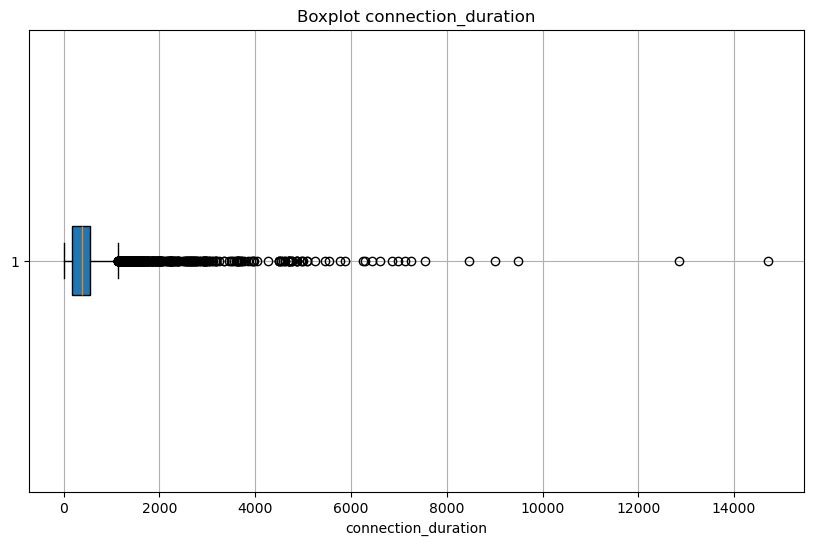

In [50]:
plt.figure(figsize=(10, 6))
plt.boxplot(charging_data_cleaned['connection_duration'], vert=False, patch_artist=True)
plt.title("Boxplot connection_duration")
plt.xlabel("connection_duration")
plt.grid(True)

In [51]:
# IQR = Interquartilsabstand
Q1 = charging_data_cleaned['connection_duration'].quantile(0.25)
Q3 = charging_data_cleaned['connection_duration'].quantile(0.75)
IQR = Q3 - Q1
outliers_connection = charging_data_cleaned[(charging_data_cleaned['connection_duration'] < (Q1 - 1.5 * IQR)) | (
        charging_data_cleaned['connection_duration'] > (Q3 + 1.5 * IQR))]
print(f"Number of outliers in column connection_duration: {outliers_connection.shape[0]}")
outliers_connection[['connectionTime', 'disconnectTime', 'doneChargingTime', 'charging_duration', 'connection_duration',
                     'kWhDelivered']]

Number of outliers in column connection_duration: 470


,connectionTime,disconnectTime,doneChargingTime,charging_duration,connection_duration,kWhDelivered
7246,2019-08-06 18:12:26-07:00,2019-08-07 17:03:44-07:00,2019-08-07 03:11:52-07:00,539.433333,1371.300000,57.217
7627,2019-08-14 06:00:40-07:00,2019-08-15 19:24:39-07:00,2019-08-14 07:48:08-07:00,107.466667,2243.983333,4.557
7911,2019-08-20 07:20:30-07:00,2019-08-21 17:32:21-07:00,2019-08-20 10:55:00-07:00,214.500000,2051.850000,14.022
8960,2019-09-10 17:33:34-07:00,2019-09-11 12:20:36-07:00,2019-09-11 12:05:00-07:00,1111.433333,1127.033333,60.012
11091,2019-10-22 16:35:50-07:00,2019-10-23 15:10:12-07:00,2019-10-23 02:58:09-07:00,622.316667,1354.366667,64.202
...,...,...,...,...,...,...
61169,2019-04-15 17:01:28-07:00,2019-04-17 17:20:42-07:00,2019-04-16 18:18:18-07:00,1516.833333,2899.233333,39.970
62402,2019-05-08 17:09:47-07:00,2019-05-09 18:23:16-07:00,2019-05-08 23:04:05-07:00,354.300000,1513.483333,36.682
62651,2019-05-14 07:48:06-07:00,2019-05-15 03:53:26-07:00,2019-05-14 13:19:33-07:00,331.450000,1205.333333,34.801
63029,2019-05-20 17:10:00-07:00,2019-05-21 17:49:28-07:00,2019-05-21 16:22:59-07:00,1392.983333,1479.466667,39.989


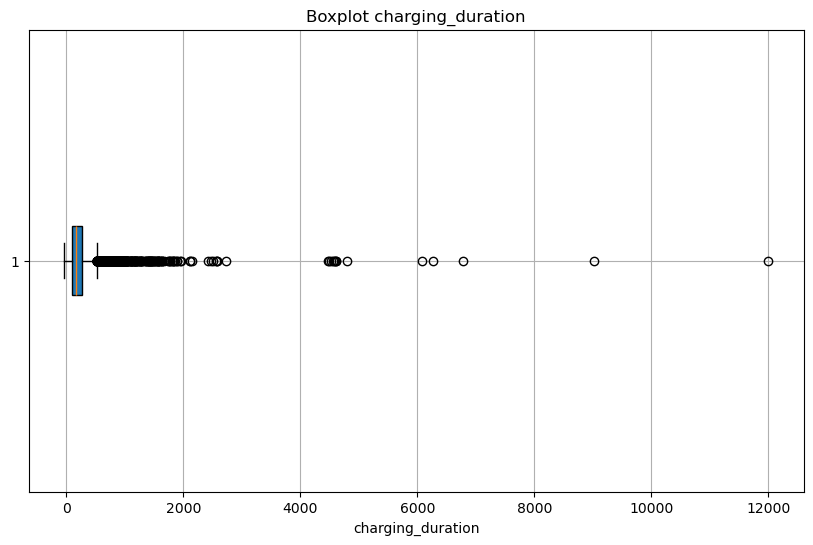

In [52]:
plt.figure(figsize=(10, 6))
plt.boxplot(charging_data_cleaned['charging_duration'], vert=False, patch_artist=True)
plt.title("Boxplot charging_duration")
plt.xlabel("charging_duration")
plt.grid(True)

In [53]:
# IQR = Interquartilsabstand
Q1 = charging_data_cleaned['charging_duration'].quantile(0.25)
Q3 = charging_data_cleaned['charging_duration'].quantile(0.75)
IQR = Q3 - Q1
outliers_charging = charging_data_cleaned[(charging_data_cleaned['charging_duration'] < (Q1 - 2 * IQR)) | (
        charging_data_cleaned['charging_duration'] > (Q3 + 2 * IQR))]
print(f"Number of outliers in charging_duration: {outliers_charging.shape[0]}")
outliers_charging[['connectionTime', 'disconnectTime', 'doneChargingTime', 'charging_duration', 'connection_duration',
                   'kWhDelivered']]

Number of outliers in charging_duration: 916


,connectionTime,disconnectTime,doneChargingTime,charging_duration,connection_duration,kWhDelivered
6,2020-01-02 06:09:14-08:00,2020-01-02 17:57:58-08:00,2020-01-02 16:59:21-08:00,650.116667,708.733333,43.477
81,2020-01-06 04:32:26-08:00,2020-01-06 15:33:41-08:00,2020-01-06 15:33:41-08:00,662.250000,661.250000,45.613
83,2020-01-06 04:48:56-08:00,2020-01-06 16:45:53-08:00,2020-01-06 16:39:35-08:00,710.650000,716.950000,66.931
164,2020-01-07 05:47:26-08:00,2020-01-07 21:15:48-08:00,2020-01-07 17:44:04-08:00,716.633333,928.366667,34.284
335,2020-01-09 06:46:36-08:00,2020-01-09 17:54:48-08:00,2020-01-09 17:24:52-08:00,638.266667,668.200000,8.081
...,...,...,...,...,...,...
66207,2019-07-26 07:34:02-07:00,2019-07-26 19:57:54-07:00,2019-07-26 18:33:43-07:00,659.683333,743.866667,13.987
66271,2019-07-29 06:46:52-07:00,2019-07-29 17:18:54-07:00,2019-07-29 17:08:24-07:00,621.533333,632.033333,1.489
66321,2019-07-30 05:32:29-07:00,2019-07-30 18:55:43-07:00,2019-07-30 18:07:04-07:00,754.583333,803.233333,1.912
66326,2019-07-30 05:55:47-07:00,2019-07-30 18:10:21-07:00,2019-07-30 17:24:50-07:00,689.050000,734.566667,30.122


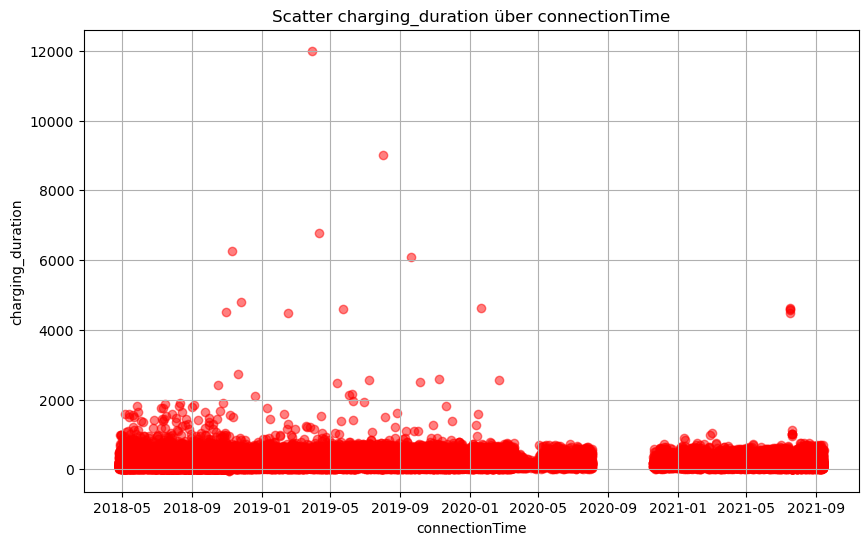

In [54]:
plt.figure(figsize=(10, 6))
plt.scatter(charging_data_cleaned['connectionTime'], charging_data_cleaned['charging_duration'], c='red', alpha=0.5,
            label='charging_duration')
plt.title("Scatter charging_duration über connectionTime")
plt.xlabel("connectionTime")
plt.ylabel("charging_duration")
plt.grid(True)

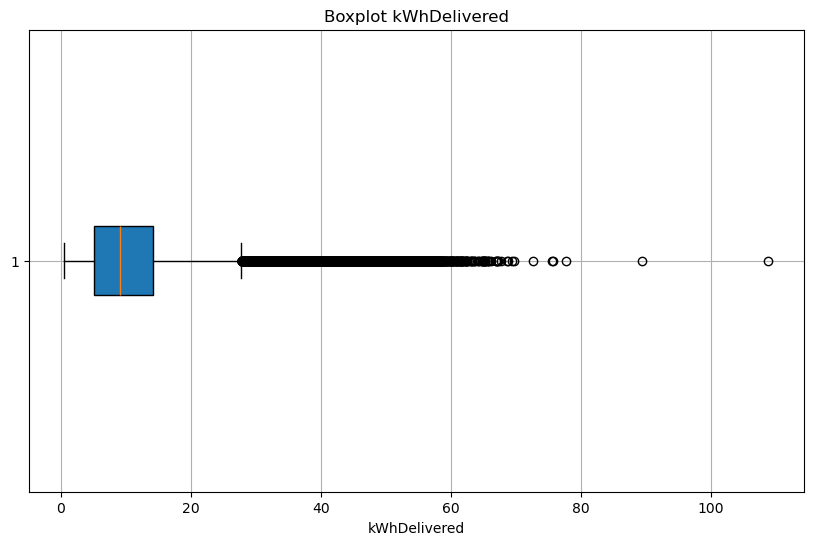

In [55]:
plt.figure(figsize=(10, 6))
plt.boxplot(charging_data_cleaned['kWhDelivered'], vert=False, patch_artist=True)
plt.title("Boxplot kWhDelivered")
plt.xlabel("kWhDelivered")
plt.grid(True)

In [56]:
# IQR = Interquartilsabstand
Q1 = charging_data_cleaned['kWhDelivered'].quantile(0.25)
Q3 = charging_data_cleaned['kWhDelivered'].quantile(0.75)
IQR = Q3 - Q1
outliers_kWhDelivered = charging_data_cleaned[
    (charging_data_cleaned['kWhDelivered'] < (Q1 - 2 * IQR)) | (charging_data_cleaned['kWhDelivered'] > (Q3 + 2 * IQR))]
print(f"Number of outliers in kWhDelivered: {outliers_kWhDelivered.shape[0]}")
outliers_kWhDelivered[
    ['connectionTime', 'disconnectTime', 'doneChargingTime', 'charging_duration', 'connection_duration',
     'kWhDelivered']]

Number of outliers in kWhDelivered: 4090


,connectionTime,disconnectTime,doneChargingTime,charging_duration,connection_duration,kWhDelivered
1,2020-01-02 05:36:50-08:00,2020-01-02 14:38:21-08:00,2020-01-02 12:18:05-08:00,401.250000,541.516667,33.097
6,2020-01-02 06:09:14-08:00,2020-01-02 17:57:58-08:00,2020-01-02 16:59:21-08:00,650.116667,708.733333,43.477
7,2020-01-02 06:17:32-08:00,2020-01-02 16:44:54-08:00,2020-01-02 12:22:40-08:00,365.133333,627.366667,32.441
13,2020-01-02 07:15:27-08:00,2020-01-02 15:55:10-08:00,2020-01-02 14:01:53-08:00,406.433333,519.716667,39.806
21,2020-01-02 07:30:19-08:00,2020-01-02 16:53:54-08:00,2020-01-02 15:53:42-08:00,503.383333,563.583333,49.874
...,...,...,...,...,...,...
66369,2019-07-30 07:51:52-07:00,2019-07-30 16:45:14-07:00,2019-07-30 16:45:14-07:00,534.366667,533.366667,52.661
66422,2019-07-31 07:06:16-07:00,2019-07-31 16:34:47-07:00,2019-07-31 13:23:44-07:00,377.466667,568.516667,34.854
66425,2019-07-31 07:10:15-07:00,2019-07-31 16:06:39-07:00,2019-07-31 16:06:39-07:00,537.400000,536.400000,49.365
66428,2019-07-31 07:30:47-07:00,2019-07-31 16:08:24-07:00,2019-07-31 14:19:23-07:00,408.600000,517.616667,37.212


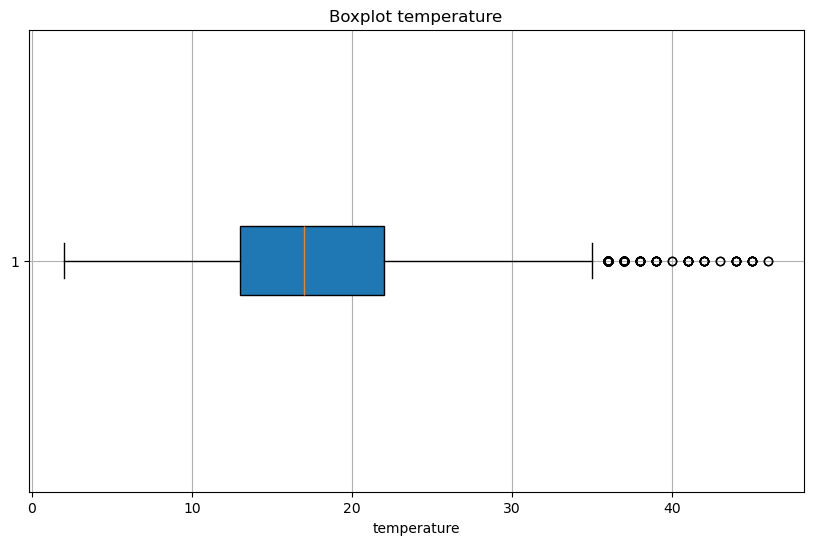

In [57]:
plt.figure(figsize=(10, 6))
plt.boxplot(weather_data_cleaned['temperature'], vert=False, patch_artist=True)
plt.title("Boxplot temperature")
plt.xlabel("temperature")
plt.grid(True)


### 5 Inconsistencies
Correct missspelling and false dataTypes

Data is conistant after visual check. Final check can be done after data types are chaned...

In [58]:

#ToDo: Check missspelling etc., dataTypes have been done above -> TBD with final check...

### 5 Feature engineering
Add aditional features (e.g. charging or idle time) -> To be discussed


### 6 Final review
Look again for missing, errorous, and inconsistant data

In [59]:
# Missing data
print("Number of missing values in cleand charging data: " + str(charging_data_cleaned.isnull().sum().sum()))
print("Number of missing values in cleand weather data: " + str(weather_data_cleaned.isnull().sum().sum()))

Number of missing values in cleand charging data: 17263
Number of missing values in cleand weather data: 0
